**Exploratory data analysis** (EDA) is the backbone of any prediction model. If our EDA is accurate, we can construct great models; however, if our EDA is not accurate, then no matter how complex the algorithm we use to construct our model, it will not perform well and may struggle to yield reliable results. EDA serves as a strong pillar in building robust and effective predictive models, providing the essential foundation for data-driven decision-making.

# **Project Goal:**
Develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and contribute to the growth of Waze's business. The first step towards constructing a robust model is to conduct **Exploratory Data Analysis** (EDA). This notebook will exclusively focus on EDA.

This project is part of the Google Advanced Data Analytics program, and the dataset used is curated by Google as part of this program.

## **Churn V/s Retained:**
Churn quantifies users who have uninstalled the app and no longer use the Waze app. Retained users are those who are still using the app and have not uninstalled it.

# **Waze**
Waze, a free navigation app owned by Google, makes it easier for drivers around the world to reach their destinations. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.



# **Imports and data loading**

In [ ]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving waze_dataset.csv to waze_dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['waze_dataset.csv']))

In [ ]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
df.shape

(14999, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The dataset comprises **14,999 rows** and **13 columns** representing different variables.  These variables comprise a mix of data types, including **three float** (decimal) variables, **eight integer** (whole number) variables, and **two string** (object) variables.  

# **Exploring Missing Values: Assessing Randomness in the Dataset**

In [ ]:
df.isna().sum().sum()

700

In [ ]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

There are **700** missing values in the **`label`** column, while the rest of the columns do not have any missing values. The **`label`** column, which indicates whether a customer is **retained** or **churned**, it plays a crucial role in understanding the **churn rate**.

Therefore, the presence of missing values in this column is concerning, as it could significantly impact the accuracy and reliability of our analysis, as well as for our future predictive models related to churn prediction.

It's essential to investigate whether these missing values occur randomly or if there's a systematic pattern to their occurrence. Addressing these missing values appropriately is necessary to ensure the integrity and validity of our churn analysis.

In [ ]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]

# Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [ ]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]

# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


* After comparing the descriptive statistics of various variables between the subsets of data with and without missing values, it is evident that there is no substantial difference in their **mean, median, standard deviations, and interquartile range (IQR)**.

* Across several variables, including **`sessions`**, 	**`drives`**,	**`total_sessions`**,	**`n_days_after_onboarding`**,	**`total_navigations_fav1`**,	**`total_navigations_fav2`**, **`driven_km_drives`**,	**`duration_minutes_drives`**, **`activity_days`** and	**`driving_days`**, the mean and median values exhibit striking similarity between the two subsets. Furthermore, the **standard deviations** and **IQR** ranges also show **minimal variation**.

* These observations strongly support the finding that the missing values in the dataset are likely to be random. The lack of significant discrepancies in the descriptive statistics confirms that the occurrence of missing values does not appear to be systematically related to the values of the variables themselves or other factors within the dataset.  

# **Impact of Missing Values in Label Column on Device Preference Analysis**





In [ ]:
# Calculate total count & percentage of iphone and android users in the subset of missing data (null_df)
print(null_df['device'].value_counts())
print(null_df['device'].value_counts(normalize = True)*100)

device
iPhone     447
Android    253
Name: count, dtype: int64
device
iPhone     63.857143
Android    36.142857
Name: proportion, dtype: float64


In [ ]:
# Calculate total count & percentage of iPhone and android users in full dataset
print(df['device'].value_counts())
print(df['device'].value_counts(normalize = True)*100)

device
iPhone     9672
Android    5327
Name: count, dtype: int64
device
iPhone     64.484299
Android    35.515701
Name: proportion, dtype: float64


Comparing the distribution of device preferences (iPhone and Android) in datasets with and without missing label values, reveals no significant difference. This indicates that the presence of missing values in the label column does not significantly alter the distribution of device preference. Hence, it is likely that the missing values are random occurrences.

# **Examine Churned V/s Retained**

In [ ]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print(df['label'].value_counts(normalize = True)*100)

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64


In this dataset, the majority of users, comprising around **82%** are **retained**, while approximately **18%** of users have **churned**. This distribution highlights a significant proportion of retained users compared to churned users.

# **Comparing Median for each Variables for Churned & Retained Users**

In this dataset, several variables exhibit right-skewed distributions, as evidenced by the descriptive statistics showing a notable difference between the mean and median values. Due to the sensitivity of the mean to outliers and extreme values, our approach will be to prioritize the utilization of the median for comparisons. Median inherent robustness will effectively mitigate the influence of outliers and extreme observations.

In [ ]:
# Group data by `label` and calculate the medians
medians_by_label = df.groupby('label').median(numeric_only = True)
medians_by_label

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


* It appears that churned users had a median of approximately **3** more drives compared to retained users, indicating slightly more usage within the specified time frame. However, the data indicates that the retained users are more active on the app compared to churned users.

* Retained users had a median of **17 active days**, while churned users had a median of only **8 active days**. Additionally, in terms of driving days, retained users had a median of **14 days**, whereas churned users had a median of only **6 days**. These findings suggest that retained users demonstrate higher levels of activity and engagement with the app compared to churned users.

* The churned users traveled a greater distance with a median of **3652.66 kilometers** driven, compared to retained users, who traveled a median of **3464.68 kilometers**. Additionally, the median driving duration for churned users (**1607.17 minutes**) is longer compared to that of retained users, who drove for **1458.05 minutes** last month. Overall, this suggests that churned users were more active in terms of both distance traveled and time spent driving compared to retained users.

## **Median kilometers per drive**

In [ ]:
print('Median kilometers per drive:')

# Divide the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

The median kilometers per drive is the same for both churned and retained users, suggesting that, on median, users in both groups cover **approximately a similar distance per drive**. This finding implies that the distance traveled per drive may not be a differentiating factor between churned and retained users, and other factors could be more influential.

Moving forward, we should investigate **how many kilometers per driving day were traveled by users in both groups**.

## **Median kilometers per driving day**

In [ ]:
# Divide the median distance by median number of driving days
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

* The high median kilometers per driving day suggests that both churned and retained users in this dataset are engaged in extensive driving activities. However, a median of **608** kilometers per driving day for churned users, which is nearly **250%** of the per-drive-day distance of retained users, appears unusually high and may require further examination.

* It is evident from these figures that this dataset may not be fully representative of the broader population of drivers. The data appears to have high proportion of long-haul truckers, especially within the churned user sample.

* In this case, we can recommend the Waze team to gather more data on the subgroup of super-drivers, who exhibit exceptionally high levels of driving activity. They seem to represent a significant user base segment and may have distinct needs and preferences that differ from typical drivers.

* There could be a possible connection between the high driving activity of super-drivers and their specific needs that may not be adequately met by the Waze app, potentially leading to user churn. These needs might vary from those of more typical drivers, such as commuters.

It highlights the importance of understanding and addressing the unique requirements of different user segments to improve user retention and overall satisfaction with the app.  

## **Further examination would be required as the above findings have raised several questions such as:**
* How was the data collected?
* Whether the dataset accurately reflect the broader population of users?
* Whether the sample of users is representative of the entire user base or if certain segments are overrepresented or underrepresented?

Addressing these questions will shed light on any biases or limitations in the dataset, allowing for a better understanding of how the dataset may impact the future churn prediction model. This insight will enable more informed decisions regarding user retention strategies, ultimately contributing to the effectiveness of the churn prediction model.

## **Median drives per driving day**

In [ ]:
# Divide the median number of drives by median number of driving days
print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

The churned users tend to have a median number of drives per driving day that is more than half higher than that of retained users, indicating a significant difference in driving behavior or usage patterns between the two groups.

Continuing with our analysis, we will explore whether there is an imbalance in the churn rate across different device types. Initially, we'll compute the count of retained and churned users for each device type, followed by determining the percentage.

In [ ]:
# For each label, calculate the number of Android users and iPhone users
print('Count of device by label:')
print(df.groupby('label')['device'].value_counts())
print()
print('Percentage of device count by label:')
print(df.groupby('label')['device'].value_counts(normalize = True) * 100)

Count of device by label:
label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

Percentage of device count by label:
label     device 
churned   iPhone     64.865931
          Android    35.134069
retained  iPhone     64.439344
          Android    35.560656
Name: proportion, dtype: float64


The percentages of iPhone and Android users among churned and retained users are almost similar, with iPhone users slightly more prevalent in both groups. This suggests that device type may not be a significant factor influencing user churn.

# **Examine Data Distribution & Identify Outliers in Key Variables using Box Plots and Histograms**

We will need to plot histograms and boxplots for several variables. Instead of rewriting the entire code each time, we will create a helper function that can plot the histogram and boxplot side by side.


In [ ]:
# Create helper function to plot histogram and boxplot
def histogrammer(column_name, median_text=True, **kwargs):
  median = round(df[column_name].median(), 1)
  # Create a grid of plots with 1 row and 2 columns
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))
  # Plot histogram on the first subplot
  ax1 = sns.histplot(x=df[column_name], ax=axes[0], color='green', **kwargs)
  # Add a vertical line for the median
  ax1.axvline(median, color='red', linestyle='--')
  if median_text:
      ax1.text(0.25, 0.85, f'Median={median}', color='red', ha='left', va='top', transform=ax1.transAxes)
  else:
      print('Median:', median)
  ax1.set_title(f'{column_name} histogram', fontsize=12, weight='bold')
  # Plot boxplot on the second subplot
  ax2 = sns.boxplot(x=df[column_name], color='orange', ax=axes[1])
  ax2.set_title(f'{column_name} boxplot', fontsize=12, weight='bold')

  # Adjust layout for better spacing
  plt.tight_layout()
  plt.show()

## **`sessions`**

***The number of occurrence of a user opening the app during the month.***

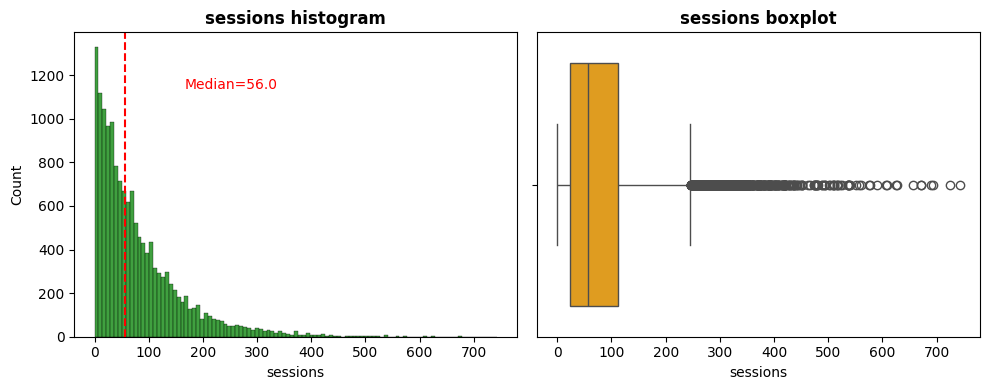

In [ ]:
# Create plots for `sessions`
histogrammer('sessions')

In [ ]:
# Descriptive statistics for `sessions`
df['sessions'].describe()

count    14999.000000
mean        80.633776
std         80.699065
min          0.000000
25%         23.000000
50%         56.000000
75%        112.000000
max        743.000000
Name: sessions, dtype: float64

* The histogram displays a right-skewed distribution for the **`sessions`** variable, with a long tail extending towards higher values on the right side. The median value of **56** indicates that **50%** of users have **56** or fewer sessions.

* The boxplot highlights the presence of outliers and extreme values, with some users having more than **700** sessions.

* Additionally, the interquartile range (IQR) shown on the boxplot reveals that the third quartile is significantly larger than the median, suggesting that a relatively small proportion of users account for a large number of sessions, contributing to the observed skewness in the distribution.

In [ ]:
# Descriptive statistics for `sessions` based on `label`
df.groupby('label')['sessions'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
churned,2536.0,87.238959,88.401217,0.0,25.0,59.0,120.0,743.0
retained,11763.0,79.197654,78.918079,0.0,23.0,56.0,109.0,725.0


* The **minimum session** count of **0** for both user groups suggests that some users may not have engaged with the app during the specified time period, indicating inactive users during the last month.

## **`drives`**

***An occurrence of driving at least 1 km during the month.***

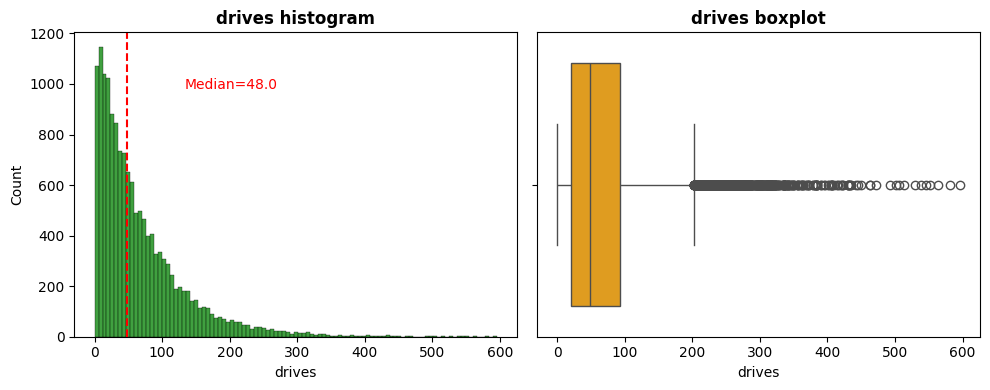

In [ ]:
histogrammer('drives')

* The data distribution for the variable **`drives`** appears to be similar to that of **`sessions`**. It exhibits a **right-skewed distribution** with a **median** of **48**, indicating that **50%** of users have a drive count of **48** or less.

* The boxplot indicates that some users have a drive count exceeding **400**, with visible outliers and extreme values.

## **`total_sessions`**

***A model estimate of the total number of sessions since a user has onboarded.***

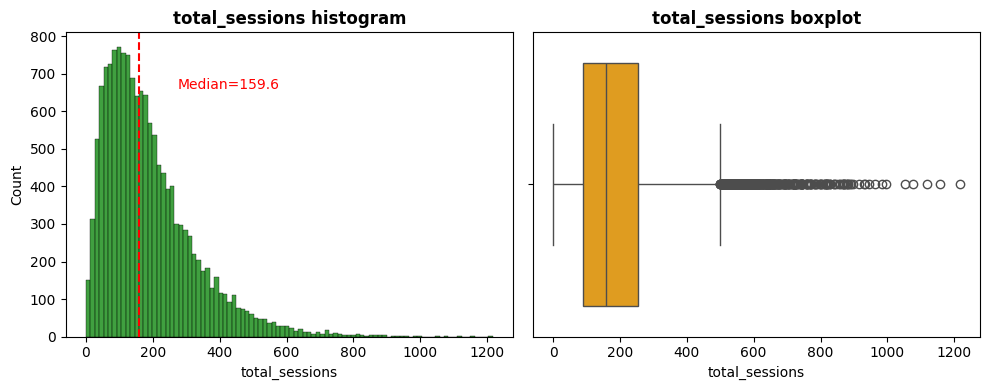

In [ ]:
histogrammer('total_sessions')

* The distribution of **`total_sessions`** appears to be right-skewed but shows a slightly more normal distribution compared to previous plots.

* Notably, the median of **`total_sessions`** is approximately **160**, while the median of **`sessions`** is **56**. This disparity suggests that a significant portion of a user's total sessions occurred within the last month relative to their overall usage since onboarding. While this observation is intriguing, further examination is needed to confirm its implications.

* Another assumption that can be derived from this observation is that the users represented in this dataset may have recently joined the app or have been using the app for a relatively shorter period. To confirm this assumption, we can examine the variable **`n_days_after_onboarding`**.

## **`n_days_after_onboarding`**

***The number of days since a user signed up for the app.***

Median: 1741.0


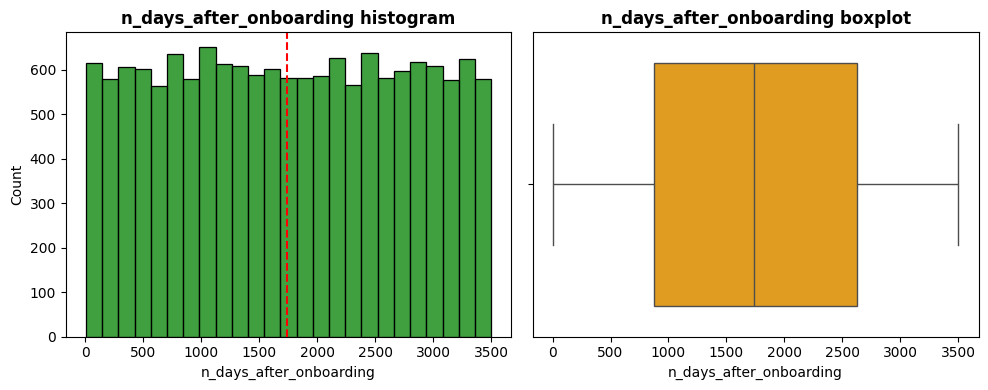

In [ ]:
histogrammer('n_days_after_onboarding', median_text=False)

In [ ]:
# Descriptive statistic
df['n_days_after_onboarding'].describe()

count    14999.000000
mean      1749.837789
std       1008.513876
min          4.000000
25%        878.000000
50%       1741.000000
75%       2623.500000
max       3500.000000
Name: n_days_after_onboarding, dtype: float64

* The variable **`n_days_after_onboarding`** exhibits a relatively uniform distribution across its range of values, indicating an even spread without a distinct skew towards any particular range. The dataset ranges from a minimum of **4** days to a maximum of **3500** days, equivalent to approximately **9.5 years**.

* The median **`n_days_after_onboarding`** value is **1741** days, corresponding to approximately **4.77** years, which signifies that **50%** of users have a tenure of **4.77** years or below. The first quartile value of **878** days means that **25%** of users have an app tenure of **2.4** years or below. Overall, it suggests a significant proportion of users have been using the app for a considerable period.

* The dataset illustrates a broad spectrum of user tenure, ranging from relatively new users to long-term users. Therefore, the dataset encompasses users with varied durations of app usage. Hence, the assumption that users joined the app recently or have a shorter app tenure does not hold valid.


## **`driven_km_drives`**

***Total kilometers driven during the month.***



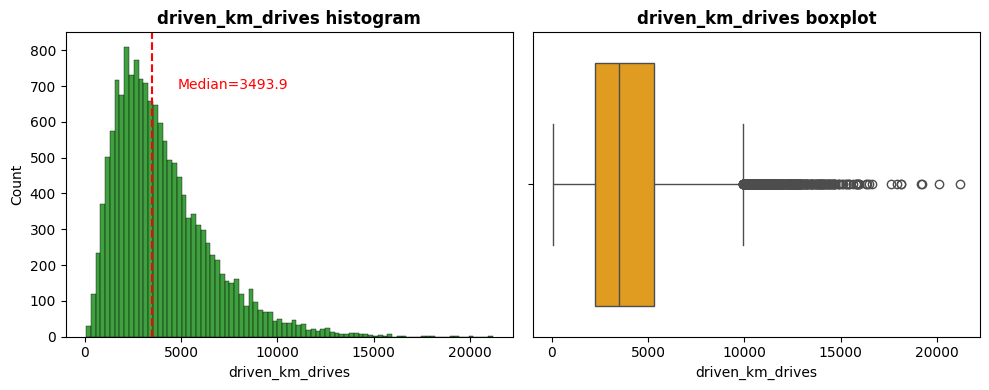

In [ ]:
histogrammer('driven_km_drives')

In [ ]:
df['driven_km_drives'].describe()

count    14999.000000
mean      4039.340921
std       2502.149334
min         60.441250
25%       2212.600607
50%       3493.858085
75%       5289.861262
max      21183.401890
Name: driven_km_drives, dtype: float64

In [ ]:
# fitler data for 'driven_km_drives' with 20000 & above
df[df['driven_km_drives']>=20000]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2955,2955,retained,21,17,82.855093,75,21,15,20108.36412,15851.727160,21,17,iPhone
12135,12135,retained,64,53,258.471276,1209,32,41,21183.40189,620.841214,10,10,Android


* The variable **`driven_km_drives`** exhibits a right-skewed distribution with a median of **3493.86** kilometers, indicating that half of the users drove **3493.86** kilometers or less during the last month.

* The histogram, which displays an approximately normal distribution up to around **10,000** kilometers, suggests that a significant proportion of users drove distances within this range.

* However, this distribution pattern also reveals outliers, as indicated by the boxplot, with a smaller number of users driving exceptionally long distances. Notably, there are users who drove up to **20,000** kilometers last month, which is over half the circumference of the earth.

* Further analysis of the data revealed that only **2 retained** users drove above **20,000** kilometers last month.

## **duration_minutes_drives**

***Total duration driven in minutes during the month.***

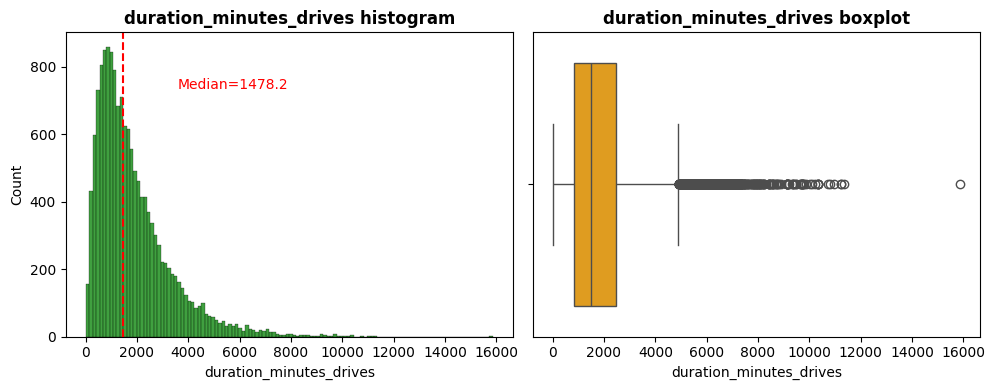

In [ ]:
histogrammer('duration_minutes_drives')

In [ ]:
df['duration_minutes_drives'].describe()

count    14999.000000
mean      1860.976012
std       1446.702288
min         18.282082
25%        835.996260
50%       1478.249859
75%       2464.362632
max      15851.727160
Name: duration_minutes_drives, dtype: float64

In [ ]:
df[df['duration_minutes_drives']>12000]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2955,2955,retained,21,17,82.855093,75,21,15,20108.36412,15851.72716,21,17,iPhone


* The **`duration_minutes_drives`** variable highlights the right-skewed nature of the data, with most users having moderate driving durations. The histogram suggests an approximately normal distribution up to around **6000** minutes.

* The median value of **1478** minutes (approximately **25 hours**) indicates that half of the users drove for **25 hours** or less during the last month.

* The boxplot reveals the presence of outliers and extreme values, with one record showing a driving duration of approximately **267 hours.**

## **activity_days**

***Number of days the user opens the app during the month.***


Median: 16.0


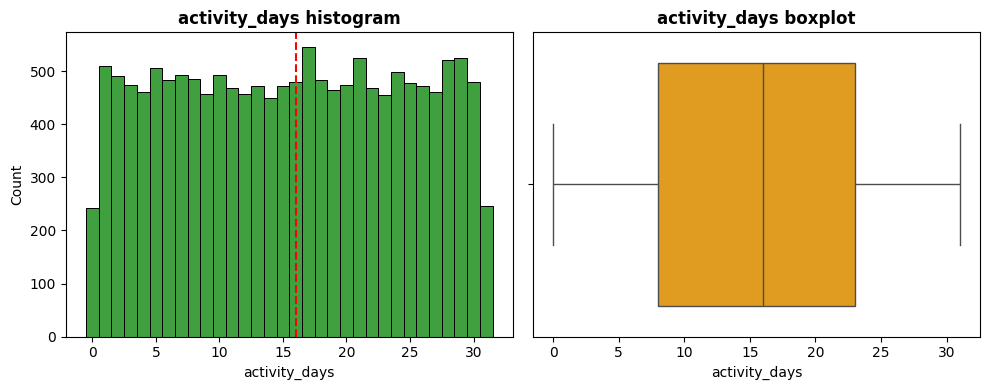

In [ ]:
histogrammer('activity_days', median_text=False, discrete = True)

In [ ]:
df['activity_days'].describe()

count    14999.000000
mean        15.537102
std          9.004655
min          0.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: activity_days, dtype: float64

In [ ]:
# How many users with 0 activity days
df[df['activity_days']==0].shape[0]

243

In [ ]:
# How many users opened the app daily (31 days)
df[df['activity_days']==31].shape[0]

246

* The distribution of **`activity_days`** appears to be centered around the median value of **16**, exhibiting a relatively symmetrical shape as indicated by the box plot.

* Notably, the histogram illustrates that approximately **500** users opened the app on each counted day. Further examination reveals that **243** users did not open the app at all, while **246** users opened the app daily.

## **`driving_days`**
***Number of days the user drives (at least 1 km) during the month.***

Median: 12.0


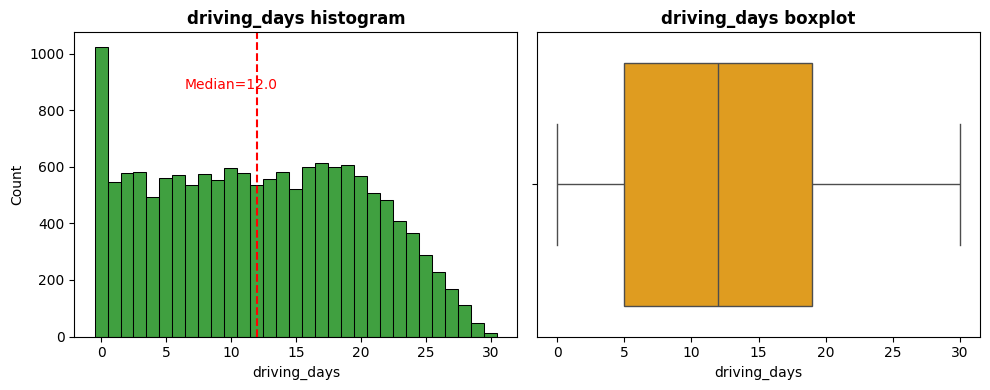

In [ ]:
print('Median:', df['driving_days'].median())
histogrammer('driving_days', discrete=True)

In [ ]:
# Descriptive Statistic for `driving_days`
df['driving_days'].describe()

count    14999.000000
mean        12.179879
std          7.824036
min          0.000000
25%          5.000000
50%         12.000000
75%         19.000000
max         30.000000
Name: driving_days, dtype: float64

In [ ]:
# How many users with 0 driving days
df[df['driving_days']==0].shape[0]

1024

* The histogram illustrates a relatively uniform distribution across the range of **1 to 20** driving days, with a noticeable decrease in frequency beyond this range.

* The **`driving_days`** variable shows a distribution centered around its median value, with the boxplot indicating that the median line is positioned approximately at the center of the interquartile range (IQR) box.

* Notably, out of the **14,999** users, **1,024** users had **0** driving days during the last month, indicating a significant portion of users who did not engage in any driving activities. This observation highlights a distinct user segment characterized by zero driving activity.

## **Comparing `activity_days` & `driving_days`:**

* Upon examining the **`activity_days`** variable, we noted the presence of **243** users with **0** **`activity_days`**, indicating that these users did not interact with the app at all during the last month. Similarly, **1,024** users had **0** driving days (**`driving_days`** = 0) within the same period, suggesting distinct user segments - **inactive app users** and **those who do not engage in driving activities.**

* Furthermore, our examination revealed that **246** users had **31** **`activity_days`**, signifying a highly engaged user segment that opened the app daily. This finding underscores the presence of diverse user behaviors and engagement levels within the dataset.

In [ ]:
# Correlation
df[['activity_days', 'driving_days']].corr()

,activity_days,driving_days
activity_days,1.000000,0.947706
driving_days,0.947706,1.000000


The strong positive correlation coefficient of **0.947** between **`activity_days`** and **`driving_days`** signifies a close relationship, indicating that users who engage more frequently with the app tend to drive more often. This observation underscores the connection between user interaction with the app and their driving behaviors.

However, it is interesting to note that there are more users who did not drive at all during the month compared to those who did not use the app at all. This suggests that while app usage and driving behavior are related, not all app users engage in driving activities. This could be attributed to various reasons, such as using the app for purposes other than driving, checking drive routes, updating settings, or accidental app openings.

Examining both variables together on a histogram can provide additional insights into this relationship and further clarify the patterns observed.

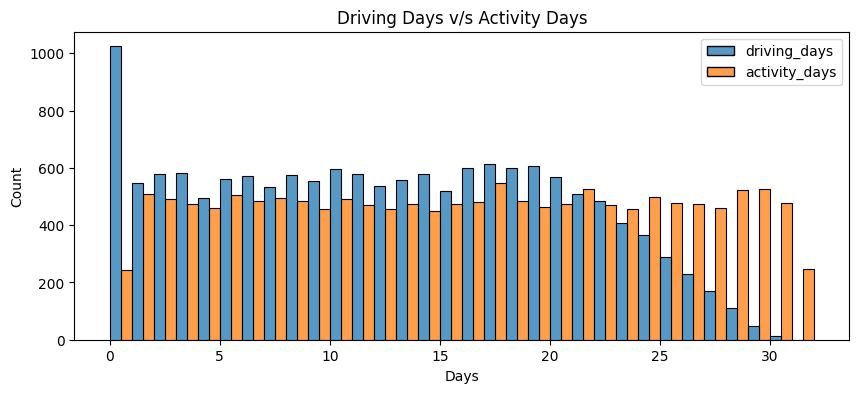

In [ ]:
# plot histogram
plt.figure(figsize=(10, 4))
sns.histplot([df['driving_days'], df['activity_days']],
             bins=range(0, 33), multiple='dodge')
plt.xlabel('Days')
plt.title('Driving Days v/s Activity Days');

The histogram reveals a discrepancy in the distribution of days for the **`activity_days`** and **`driving_days`** variables. While **`activity_days`** is consistently **31** days (representing the entire month), **`driving_days`** does not uniformly span **31** days and instead shows a maximum of **30** days.



In [ ]:
# Confirm maximum days for both variables
print('acitvity_days:', df['activity_days'].max())
print('driving_days:', df['driving_days'].max())

acitvity_days: 31
driving_days: 30


It is theoretically possible that none of the **14,999** users drove for **31** days in the month, although it is highly unlikely. This discrepancy suggests a potential issue or limitation in the data collection or recording process for the **`driving_days`** variable. In this case, we should consult the data team at **Waze** for additional information and clarification.

The next step involves creating a scatter plot where **`driving_days`** is plotted on the x-axis and **`activity_days`** is plotted on the y-axis.

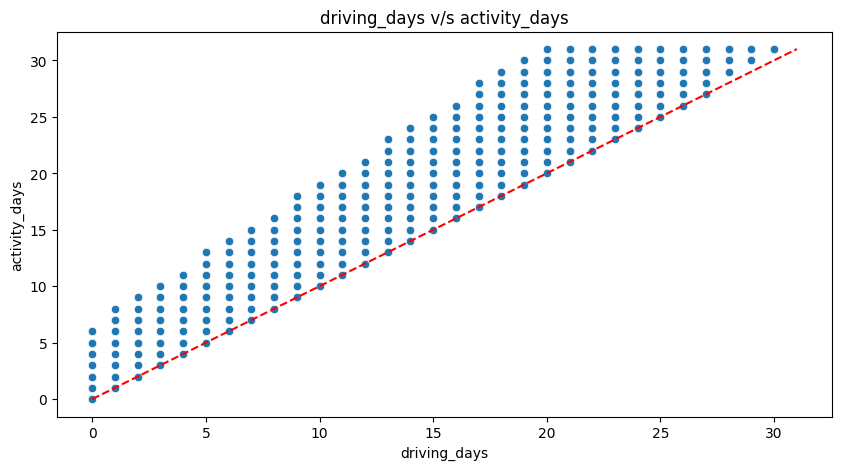

In [ ]:
# scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--')
plt.title('driving_days v/s activity_days');

In this context, **`driving_days`** (days a user drives) cannot exceed **`activity_days`** (days of app engagement), as each driving day should correspond to an app activity day. The scatterplot confirms no instances where **`driving_days`** exceed **`activity_days`**, ensuring data consistency and accurate representation of the relationship for all users in the dataset.

## **`device`**
***The type of device a user starts a session with***

Since **`device`** is a categorical variable, using a **pie** chart would be an effective way to visualize its distribution.

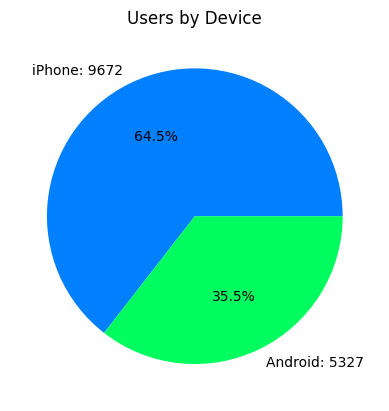

In [ ]:
# Create Pie chart for categorical variable `device`
device = df['device'].value_counts()
color_palette = sns.color_palette('gist_ncar')

plt.pie(device, labels = [f'{device.index[0]}: {device.values[0]}',
                          f'{device.index[1]}: {device.values[1]}'],
                autopct = '%1.1f%%', colors=color_palette)
plt.title('Users by Device');

The dataset shows that **iPhone** users account for nearly double the number of **Android** users, with **9672 (64.5%)** iPhone users and **5327 (35.5%)** Android users.

## **`label`**

***Binary target variable (retained vs churned) for if a user has churned anytime during the course of the month.***

Given that **`label`** is another categorical variable, we will create a pie chart to visualize its distribution.

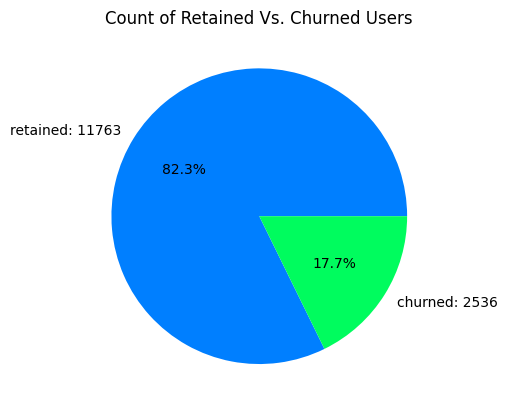

In [ ]:
# Create Pie chart for categorical variable `label`
data = df['label'].value_counts()
color_palette = sns.color_palette('gist_ncar')

plt.pie(data, labels=[f'{data.index[0]}: {data.values[0]}',
                      f'{data.index[1]}: {data.values[1]}'],
        autopct = '%1.1f%%', colors=color_palette)
plt.title('Count of Retained Vs. Churned Users');

The pie chart distribution indicates that less than **18%** of users have churned. This highlights a significant disparity in user representation between the churned and retained labels within the dataset, a common observation in churn prediction datasets.

# **Retention by `device`**

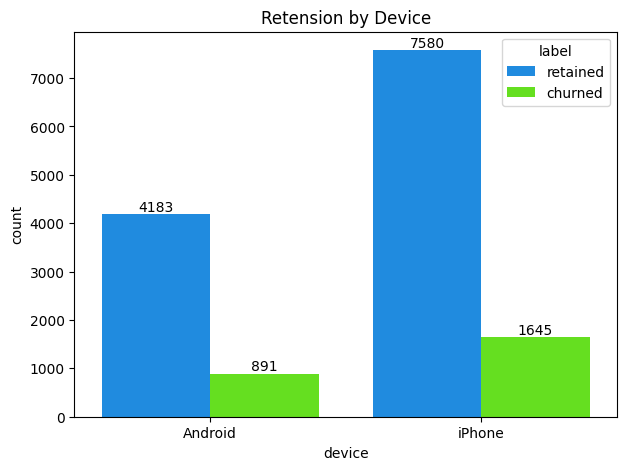

In [ ]:
# Bar plot
plt.figure(figsize=(7,5))
a = sns.countplot(data=df, x='device',
                  hue='label',
                  palette = 'gist_rainbow_r')
plt.title('Retension by Device')

for bars in a.containers:
  a.bar_label(bars)

* Proportion of churned to retained for **Android**: 891 / 4183 ≈ **0.213** or **21.3%**

* Proportion of churned to retained for **iPhone**: 1645 / 7580 ≈ **0.217** or **21.7%**

Comparing these proportions, we can see that both iPhone and Android users have similar ratios of churned to retained users (approximately 21.7% for iPhone and 21.3% for Android).

# **Retention by kilometers driven per driving day**

In [ ]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Statistic Descriptive
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

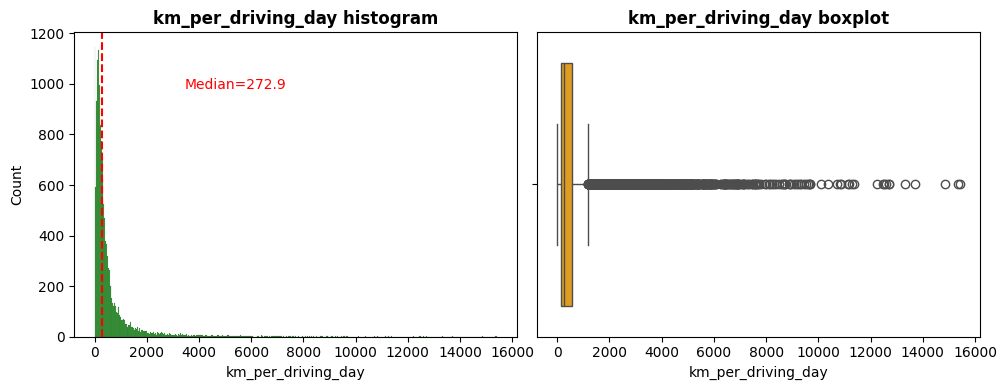

In [ ]:
histogrammer('km_per_driving_day')

* The histogram reveals a heavily right-skewed distribution for the **`km_per_driving_day`** variable, with noticeable outliers and extreme values as highlighted by the boxplot. The descriptive statistics further indicate a maximum value of **15,420 kilometers** per driving day, which appears highly implausible for typical driving behavior.

* To address this issue, we will filter out rows where the distance in the **`km_per_driving_day`** column exceeds a realistic threshold. Considering a maximum plausible daily driving distance of around **1,200** km (achieved by driving **100 km/hour for 12 hours**), we will exclude rows with distances exceeding this threshold.

* Even **1,200** km is a high but more feasible daily driving distance. This approach will help in refining the dataset and focusing on more feasible driving behavior.

Our next step involves plotting a histogram of the **`km_per_driving_day`** column while excluding users with values greater than **1,200 km** per driving day. We will use seaborn's **histplot() function**, setting the multiple parameter to '**fill**'. This setting will ensure that each bar in the histogram has **equal height** and is colored to represent the percentage of users who churned and those who were retained within each bin.

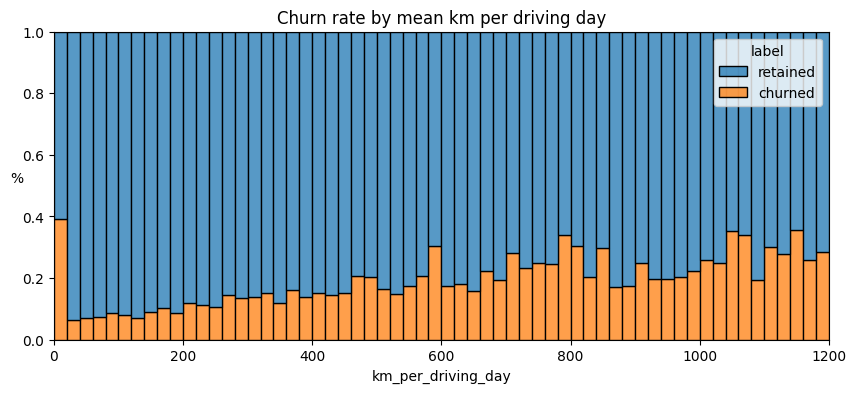

In [ ]:
# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='km_per_driving_day',
             bins = range(0, 1201, 20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km per driving day');

The histogram illustrates the relationship between churn rate and mean daily driving distance (**`km_per_driving_day`**). As the mean daily driving distance increases, the proportion of churned users tends to rise. In other words, users who drive more kilometers per day are more likely to churn (indicated by the orange bars) rather than being retained (blue bars).

# **Churn rate per number of `driving_days`**

We will create a histogram similar to the previous one, representing the churn rate for each numbers of driving days.

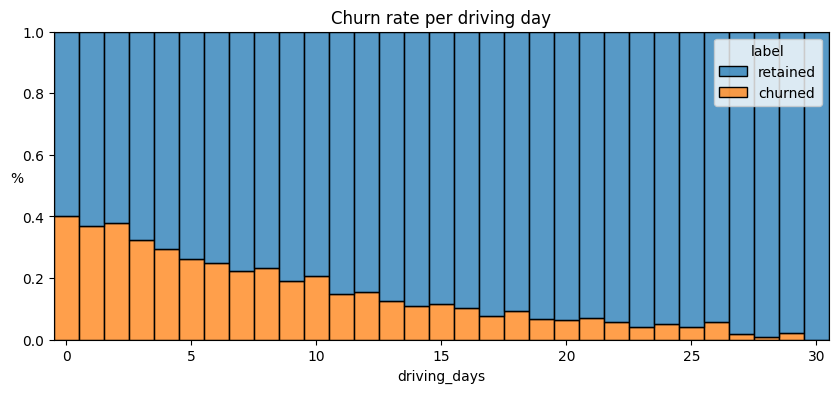

In [ ]:
# Histogram showing churn rate per driving day
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='driving_days',
             bins = range(1, 32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate per driving day');

The histogram reveals that the churn rate is highest among users who drove very infrequently during the last month. Notably, **40%** of users who had **0** **`driving_days`** churned. Interestingly, not a single user churned among those who actively drove daily for the entire month (**30 days**).

# **Churn rate per number of `activity_days`**

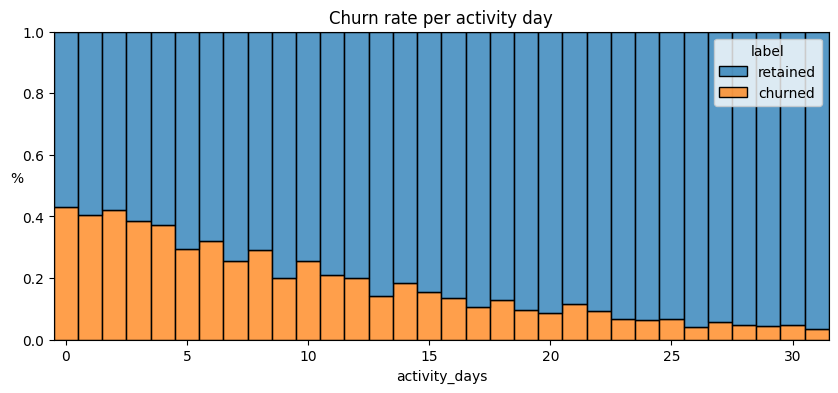

In [ ]:
# Histogram showing churn rate per activity days
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='activity_days',
             bins = range(1, 32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate per activity day');

The distribution of **`activity_days`** closely mirrors that of **`driving_days`**. Notably, over **40%** of users churned who did not open the app at all during the month. The histogram further indicates that users who open the app daily or more frequently are less likely to churn.

The high churn rate among users who use the app less and have fewer or zero driving days (**`driving_days`**=0 or less) may have several reasons, such as user dissatisfaction in the past or a lesser need for a navigation app.

# **Proportion of sessions that occurred in the last month**

We will create a new variable **`percent_sessions_in_last_month`** by dividing the number of monthly sessions (**`sessions`**) by the model estimate of total sessions (**`total_sessions`**) since the user onboarded. This new variable will help us understand what portion of the total sessions since user onboarding have been completed in the last month.

In [ ]:
# Create new variable `percent_sessions_in_last_month`
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# Print median
print('Median of `percent_sessions_in_last_month`:', df['percent_sessions_in_last_month'].median())
print()
# Display dataset
df.head()

Median of `percent_sessions_in_last_month`: 0.42309702992763176



,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266


Now let's create a histogram & boxplot depicting the distribution and outliers for the new variable **`percent_sessions_in_last_month`**.

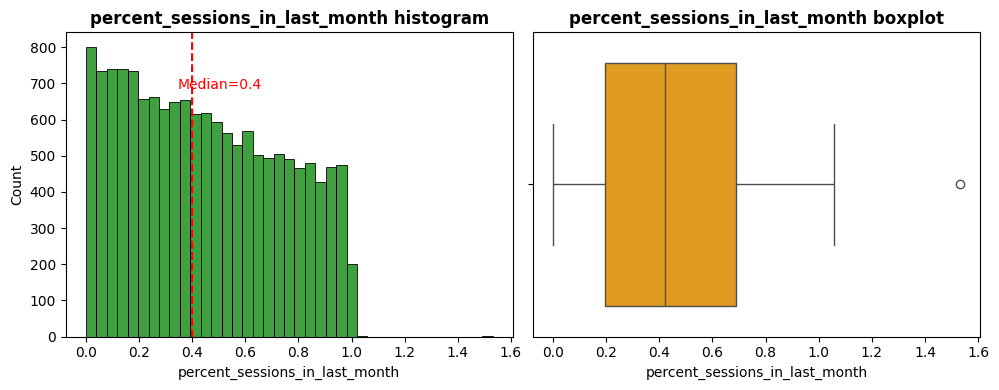

In [ ]:
histogrammer('percent_sessions_in_last_month')

* The histogram indicates that the bins are somewhat uniformly distributed between **0** and **1.0**, with a decrease in frequency as values increase towards **1.0**. The boxplot shows data points extending beyond **1.0**, including one extreme point near **1.5**.

* This observation suggests that there are records where **`total_sessions`** is less than **`sessions`**, indicating potential data inconsistencies. Although **`total_sessions`** is a model estimate of the total number of sessions since a user has onboarded, these discrepancies warrant consulting the Waze team for further investigation.

In [ ]:
# Count rows with above 1.0
df[df['percent_sessions_in_last_month']>1.0].shape[0]

19

In [ ]:
# Count rows with above 1.4
df[df['percent_sessions_in_last_month']>1.4].shape[0]

1

Yes, our observation is correct; there are **19** records where **`percent_sessions_in_last_month`** exceeds **1.0**, indicating that **`total_sessions`** are less than **`sessions`**. This discrepancy is inconsistent because a user cannot have more sessions in a month compared to the total sessions since they onboarded.

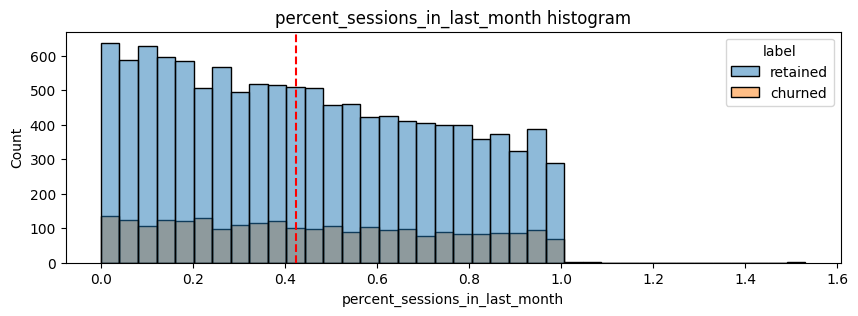

In [ ]:
# Histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x='percent_sessions_in_last_month',
             hue='label',
             multiple='layer')
plt.axvline(df['percent_sessions_in_last_month'].median(), color='red', linestyle='--')
plt.title('percent_sessions_in_last_month histogram');

The histogram indicates that **50%** of the users have **40%** or more sessions in just the last month. Now let's examine the median value of the **`n_days_after_onboarding`** variable to gain a better understanding.

In [ ]:
# Calculate median value for `n_days_after_onboarding`
df['n_days_after_onboarding'].median()

1741.0

The median for **`n_days_after_onboarding`** is **1741** days, which is approximately **5** years. It is surprising that users had **40%** or more sessions in the last month, considering that the median time since onboarding is **5** years. Next, we will create a histogram for **`n_days_after_onboarding`** only for users who had **40%** or more of their sessions in the last month.




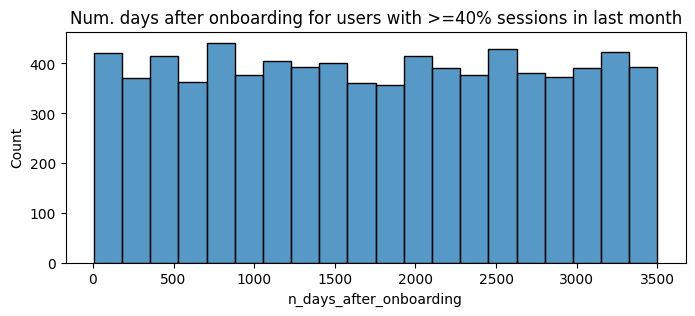

In [ ]:
# Filter data with `percent_sessions_in_last_month` >=0.4
data = df[df['percent_sessions_in_last_month']>=0.4]

# Histogram
plt.figure(figsize=(8, 3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The observation that **`n_days_after_onboarding`** is uniformly distributed among users with **40%** of  sessions in the last month is quite unusual. It's surprising that many long-time users suddenly used the app so much in the last month. Is there a specific reason for this? We need to consult the Waze data team


# **Proportion of Monthly Drives to Sessions Ratio**

We will create a new variable **`monthly_drives_per_session_ratio`** by dividing the number of **`drives`** by the number of **`session`**. This new variable will help us understand the proportion or ratio of sessions that resulted in drives.

In [ ]:
# Create a new variable `monthly_drives_per_session_ratio`
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524


Both **`drives`** and **`sessions`** have **zero** values for some users. Therefore, when calculating **`monthly_drives_per_session_ratio`**, the result will be **NaN** (Not a Number) due to **division by zero** for those users where drives and sessions are both **zero**. We need to handle this situation by replacing the **NaN** values with **0**.

In [ ]:
# Count missing value
df['monthly_drives_per_session_ratio'].isna().sum()

105

In [ ]:
# Replace Nan with '0'
df['monthly_drives_per_session_ratio'].fillna(0, inplace=True)

In [ ]:
# Count missing value
df['monthly_drives_per_session_ratio'].isnull().sum()

0

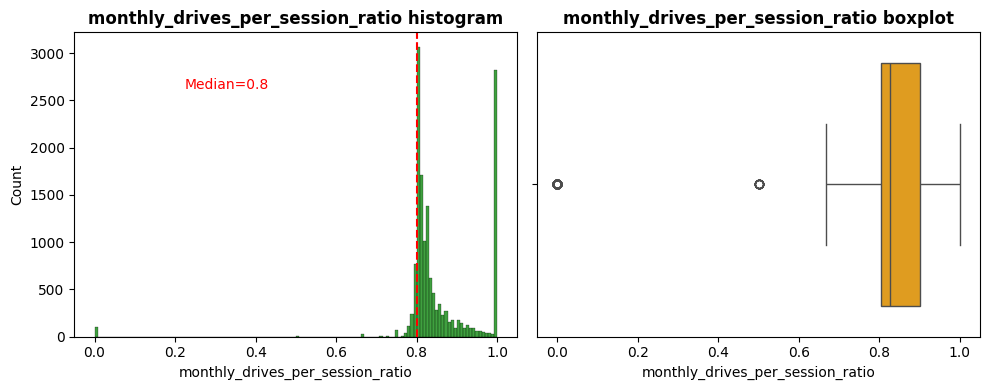

In [ ]:
histogrammer('monthly_drives_per_session_ratio')

In [ ]:
# Total count of users with `monthly_drives_per_session_ratio` 1.0 (100%)
df[df['monthly_drives_per_session_ratio']==1.0].shape[0]

2809

* The median of **`monthly_drives_per_session_ratio`** is **0.82**, indicating that half of the users in this dataset have a completed drive rate of **82%** or higher. This signifies that for most users in the dataset, a significant proportion of their sessions resulted in drives.

* Approximately **19%** of users (**2809 out of 14,999**) in this dataset exhibited a specific behavior where their **`monthly_drives_per_session_ratio`** is **1.0**, meaning all of their sessions (**100%**) resulted in drives.

* This finding suggests the presence of a subgroup of users who may be **serious drivers** and use the app exclusively while driving. While this is an interesting observation, it would be beneficial to consult with the **Waze** team to gain insights into any underlying reasons or patterns associated with this behavior.

* The boxplot reveals outliers in the lower bound, primarily due to users with a **`monthly_drives_per_session_ratio`** of **0.0**, resulting from **zero** values in both **`drives`** and **`sessions`** for certain users. Additionally, a small number of users exhibit a ratio around **0.5**, indicating relatively low activity levels. These outliers in the lower bound represent inactive or **less active users** within the dataset.

# **Handing Outliers**

Our final step in this EDA will be to address outliers. As indicated by our analysis, many variables in this dataset exhibit outliers and extreme values, as evidenced by the heavily right-skewed histogram distributions and boxplots.

To mitigate the influence of outliers, we will impute the outlying data with more reasonable values based on a specified percentile threshold. In our scenario, we will develop a function to compute the  $95^\text{th}$ percentile for a specified column and then replace values exceeding this percentile with the  $95^\text{th}$ percentile value.

In [ ]:
# Creat a function for outliers imputation
def outlier_imputer(column_name, percentile):
  # Calculate threshold
  threshold = df[column_name].quantile(percentile)
  # Impute threshold for values > than threshold
  df.loc[df[column_name]>threshold, column_name] = threshold

  print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Since we know that these variables contain outliers and extreme values, we will apply this function to the following variables:

* **`sessions`**
* **`drives`**
* **`total_sessions`**
* **`driven_km_drives`**
* **`duration_minutes_drives`**

In [ ]:
for column in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
  outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [ ]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


After imputing the outliers with the $95^\text{th}$ percentile value for the variable, it now appears well-balanced, and the values align with realistic expectations.

# **Conclusion**

Our exploratory data analysis revealed that **17.7%** of users churned, while **82.3%** of users retained, with consistent churn proportions across different device types. The analysis identified distinct user subgroups: **super-drivers** covering long distances, **dedicated drivers** whose every session results in driving activities, **inactive users** who did not engage with the app at all, and **less active** users who used the app but did not drive.

A notable discovery was that users driving very long distances are more likely to churn, while those who engage frequently with the app and drive regularly show lower churn rates. This analysis has raised several important questions that we need to address with the **Waze** data team.

# **Questions:**

## **Was there anything that led you to believe the data was erroneous or problematic in any way?**
* Most of the data was not problematic; however, several variables exhibited unrealistic outlying values. For example, the maximum value for **`driven_km_drives`** was **21,183**, which does not seem realistic considering the corresponding **`driving_days`** they had. It is implausible for any human being to travel such distances within the recorded timeframe.

## **Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?**
I have several questions that I would like to discuss with the Waze team based on our analysis findings:

* The median for **`percent_sessions_in_last_month`** is **40%**, and the median **`n_days_after_onboarding`** is **1741.0** days, approximately **4.77** or **5** years. This raises the question: Why did so many long-time users suddenly increase their app usage significantly in the last month? What could be the specific reasons behind this increase in app usage among long-term users? Are there any promotional activities or other factors driving this behavior?

* Why does the **`driving_days`** variable only have data for **30 days**, while the **`activity_days`** variable covers a full month of **31 days**? Is there a reason or explanation for this discrepancy within the dataset?

* Approximately **19%** of users in this dataset have a **100%** drive rate, meaning all their sessions resulted in driving activities. I would like to know whether this observation reflects real user behavior?

## **What factors correlated with user churn? How?**
* The variable **`km_per_driving_day`** shows a **positive correlation** with the churn rate, indicating that users who drive more kilometers per driving day are more likely to churn, whereas those who drive fewer kilometers per driving day are less likely to churn.

* On the other hand, **`driving_days`** exhibits a **negative correlation** with the churn rate, suggesting that users who drive more frequently are less likely to churn. Notably, users who drove for all **30 days** did not churn.